<a href="https://colab.research.google.com/github/42697387/Procesamiento-del-Habla/blob/main/HerediaMartinGaspar_TP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### TP5: Chatbots RAG con LLMs y Embeddings (Hugging Face)




#### a) Creación del conjunto de datos de evaluación.

 Introducción y Contexto

En esta sección, primero recuperaremos el dataset original del TP4 (nuestra "Base de Conocimiento") para que esté disponible en memoria. Luego, procederemos a crear un **Dataset de Evaluación** separado.

El dataset de evaluación no debe ser idéntico al de entrenamiento. Debe contener preguntas formuladas de manera diferente (paráfrasis) pero que busquen la misma intención, junto con su respuesta esperada (*Ground Truth*). Esto es vital para probar la capacidad de generalización del modelo de Embeddings y la capacidad de generación del LLM.

Generaré 10 pares de preguntas/respuestas de evaluación que cubren envíos, pagos y devoluciones.

In [ ]:
# 1. Recuperación del Dataset Original (Base de Conocimiento del TP4)
# Unificamos Pregunta y Respuesta en un solo texto para el documento a indexar.
preguntas_base = [
    "¿Cuánto cuesta el envío?", "¿Cuál es el costo de envío a mi ciudad?", "¿Hacen envíos a todo el país?",
    "¿Cuánto tarda en llegar mi pedido?", "¿Cuál es el tiempo de entrega estimado?", "¿Puedo rastrear mi pedido?",
    "¿Dónde está mi paquete?", "¿Qué empresa de correos usan?", "Mi pedido no ha llegado, ¿qué hago?",
    "¿Ofrecen envío gratis?", "¿Qué métodos de pago aceptan?", "¿Puedo pagar con tarjeta de crédito?",
    "¿Aceptan transferencia bancaria?", "¿Es seguro pagar en su sitio web?", "¿Tienen cuotas sin interés?",
    "Mi pago fue rechazado, ¿por qué?", "¿Cómo uso un cupón de descuento?", "¿Dónde ingreso mi código de descuento?",
    "¿El precio incluye IVA?", "Necesito una factura A, ¿cómo la solicito?", "¿Cuál es la política de devoluciones?",
    "¿Cómo puedo devolver un producto?", "El producto llegó dañado, ¿qué hago?", "Me equivoqué de talle, ¿puedo cambiarlo?",
    "¿Cuántos días tengo para hacer una devolución?", "¿Quién paga el envío de la devolución?", "¿Cuándo recibiré mi reembolso?",
    "¿Cómo es el proceso de reembolso?", "No recibí el producto que compré", "¿Puedo cancelar mi pedido?",
    "¿Cómo creo una cuenta?", "Olvidé mi contraseña, ¿cómo la recupero?", "¿Cómo puedo modificar mis datos personales?",
    "¿Es necesario registrarse para comprar?", "No puedo iniciar sesión", "¿Cómo elimino mi cuenta?",
    "¿Dónde veo mi historial de pedidos?", "¿Para qué sirve registrarse?", "¿Mis datos están seguros con ustedes?",
    "¿Cómo me doy de baja del newsletter?", "¿Tienen stock de este producto?", "¿Hay disponibilidad del artículo X?",
    "¿Qué talles tienen para esta remera?", "¿Viene en otros colores?", "¿Cuál es la garantía del producto?",
    "¿El producto tiene garantía oficial?", "¿Dónde puedo ver la guía de talles?", "¿El producto es original?",
    "¿Venden al por mayor?", "¿Cómo sé si el producto es compatible con mi modelo?"
]

respuestas_base = [
    "Puedes calcular el costo de envío ingresando tu código postal en la página del producto.",
    "El costo de envío depende de tu ubicación. Ingresa tu CP en el checkout.",
    "Sí, realizamos envíos a todo el territorio nacional.",
    "El tiempo de entrega estándar es de 3 a 5 días hábiles.",
    "El tiempo de entrega estimado se muestra al finalizar la compra.",
    "Sí, recibirás un correo con el número de seguimiento al despachar.",
    "Puedes consultar el estado con el link de seguimiento enviado por mail.",
    "Trabajamos con Correo Argentino, Andreani y OCA.",
    "Contáctate con soporte con tu número de pedido.",
    "Sí, envío gratis en compras superiores a $50.000.",
    "Aceptamos tarjetas de crédito, débito, transferencia y Mercado Pago.",
    "Sí, aceptamos todas las principales tarjetas de crédito.",
    "Sí, selecciona transferencia bancaria al finalizar la compra.",
    "Sí, contamos con certificado SSL y procesamos pagos seguros.",
    "Sí, tenemos cuotas sin interés con bancos seleccionados.",
    "Puede ser por fondos insuficientes o error de datos. Verifica tu tarjeta.",
    "Aplica tu cupón en el carrito antes de finalizar.",
    "Ingresa el código en el checkout antes de pagar.",
    "Sí, los precios incluyen IVA.",
    "Carga tu CUIT en los datos de facturación al comprar.",
    "Puedes devolver productos en 10 días si están sin uso.",
    "Ve a 'Mis Pedidos' y selecciona 'Solicitar devolución'.",
    "Envíanos fotos del daño a soporte para gestionarlo.",
    "Sí, el primer cambio de talle es gratuito.",
    "Tienes 10 días corridos desde la recepción.",
    "Si es error nuestro es gratis, si es cambio de opinión pagas tú.",
    "El reembolso se procesa en 72 horas hábiles tras recibir el producto.",
    "Inspeccionamos el producto y reembolsamos al mismo medio de pago.",
    "Contacta a soporte con tu número de orden.",
    "Puedes cancelar si aún no fue despachado desde 'Mis Pedidos'.",
    "Haz clic en 'Registrarse' y completa tus datos.",
    "Usa la opción '¿Olvidaste tu contraseña?' al iniciar sesión.",
    "En 'Mi Cuenta' > 'Datos Personales'.",
    "No es obligatorio, puedes comprar como invitado.",
    "Verifica email y contraseña o recupérala.",
    "Solicita la baja a soporte de datos personales.",
    "En la sección 'Mis Pedidos' de tu perfil.",
    "Para checkout rápido y ver historial.",
    "Sí, cumplimos con leyes de protección de datos.",
    "Link 'Unsubscribe' al pie de los emails.",
    "Si deja agregar al carrito, tenemos stock.",
    "La página del producto indica si está agotado.",
    "Los talles disponibles se listan en el producto.",
    "Los colores se muestran como opciones en la página.",
    "6 meses por defectos de fábrica.",
    "Sí, garantía oficial del fabricante.",
    "En la página del producto, botón 'Guía de Talles'.",
    "Sí, 100% originales y nuevos.",
    "Solo ventas minoristas por la web.",
    "Lee la descripción técnica o consulta a soporte."
]

# Creamos la lista de documentos para la base de conocimiento
docs_conocimiento = [f"Pregunta: {p} \nRespuesta: {r}" for p, r in zip(preguntas_base, respuestas_base)]

# 2. Creación del Dataset de Evaluación (Preguntas nuevas + Ground Truth)
dataset_evaluacion = [
    {"pregunta": "¿Tengo que pagar algo si devuelvo lo que compré?", "ground_truth": "Si es por error nuestro es gratis, si es cambio de opinión pagas el envío."},
    {"pregunta": "¿Trabajan con Andreani?", "ground_truth": "Trabajamos con Correo Argentino, Andreani y OCA."},
    {"pregunta": "¿Me mandan factura A?", "ground_truth": "Sí, carga tu CUIT en los datos de facturación al comprar."},
    {"pregunta": "¿Es peligroso poner mi tarjeta en la web?", "ground_truth": "No, contamos con certificado SSL y pagos seguros."},
    {"pregunta": "¿Cómo hago para no recibir más correos?", "ground_truth": "Usa el link 'Unsubscribe' al pie de los emails."},
    {"pregunta": "¿Venden cosas truchas?", "ground_truth": "No, todos los productos son 100% originales y nuevos."},
    {"pregunta": "¿Cuánto demoran en traerme el paquete?", "ground_truth": "El tiempo estándar es de 3 a 5 días hábiles."},
    {"pregunta": "Compré algo y no me anda, ¿tiene garantía?", "ground_truth": "Sí, tienen 6 meses de garantía por defectos de fábrica."},
    {"pregunta": "¿A partir de qué monto el envío es sin cargo?", "ground_truth": "Envío gratis en compras superiores a $50.000."},
    {"pregunta": "Me olvidé la clave para entrar", "ground_truth": "Usa la opción '¿Olvidaste tu contraseña?' al iniciar sesión."}
]

print(f"Base de conocimiento cargada: {len(docs_conocimiento)} documentos.")
print(f"Dataset de evaluación creado: {len(dataset_evaluacion)} preguntas de prueba.")

Base de conocimiento cargada: 50 documentos.
Dataset de evaluación creado: 10 preguntas de prueba.


 Análisis del Dataset de Evaluación

Hemos creado con éxito dos conjuntos de datos.

1.  **Base de Conocimiento:** Contiene los 50 pares originales formateados como un solo bloque de texto. Esto es crucial para que el modelo de *Embeddings* indexe tanto la pregunta como la respuesta asociada.
2.  **Dataset de Evaluación:** Contiene 10 preguntas que **no existen textualmente** en la base de conocimiento (por ejemplo, *"¿Venden cosas truchas?"* vs *"¿El producto es original?"*), pero cuya respuesta semántica sí está disponible. Esto nos permitirá medir si el sistema realmente "entiende" o solo busca palabras clave exactas.




#### b) Selección de Modelo LLM y Embeddings.

##### Introducción a la Selección de Modelos

Para construir un sistema RAG eficiente en un entorno limitado como Google Colab, debemos seleccionar modelos que equilibren rendimiento y consumo de recursos.

**Elección del LLM (Generador):**

  * **Modelo:** `google/flan-t5-base`.
  * **Justificación:** Flan-T5 es un modelo *Sequence-to-Sequence* afinado con instrucciones. Es mucho más ligero que modelos como Llama-2 o Mistral (aprox. 250M de parámetros vs 7B), lo que permite ejecutarlo en la CPU o GPU básica de Colab sin problemas de memoria. Es excelente siguiendo instrucciones para tareas de Q\&A.

**Elección de Modelos de Embeddings (Recuperadores):**
Seleccionaré dos modelos para comparar un enfoque genérico vs. uno multilingüe:

1.  **Modelo A:** `sentence-transformers/all-MiniLM-L6-v2`.
      * *Justificación:* Es el estándar de la industria para eficiencia/velocidad. Es muy rápido y liviano, pero fue entrenado predominantemente en inglés. Quiero ver cómo se comporta con nuestro dataset en español.
2.  **Modelo B:** `sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2`.
      * *Justificación:* Específicamente diseñado para trabajar con múltiples idiomas, incluido el español. Teóricamente, debería capturar mejor los matices semánticos de nuestras preguntas (ej. "truchas" vs "originales").

<!-- end list -->

In [ ]:
# Instalación de librerías necesarias
!pip install langchain langchain-community langchain-huggingface faiss-cpu sentence-transformers transformers -q

print("Librerías instaladas correctamente.")

# Definición de variables de configuración para los modelos
MODELO_LLM_ID = "google/flan-t5-base"
MODELO_EMBEDDING_A_ID = "sentence-transformers/all-MiniLM-L6-v2"
MODELO_EMBEDDING_B_ID = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"

print(f"LLM seleccionado: {MODELO_LLM_ID}")
print(f"Embedding A: {MODELO_EMBEDDING_A_ID}")
print(f"Embedding B: {MODELO_EMBEDDING_B_ID}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
Librerías instaladas correctamente.
LLM seleccionado: google/flan-t5-base
Embedding A: sentence-transformers/all-MiniLM-L6-v2
Embedding B: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2


##### Observación sobre la Selección

La instalación de `langchain` y `faiss-cpu` es fundamental. FAISS será nuestra base de datos vectorial (VectorStore). Al definir los IDs de los modelos aquí, facilitamos el cambio de experimentos en el futuro sin reescribir todo el código de la clase Chatbot.


#### c) Implementación de la Clase ChatBot.

Introducción al Código

Implementaré una clase `RAGChatBot` que encapsule toda la lógica. Esta clase utilizará **LangChain** para orquestar el flujo.

La clase tendrá tres métodos principales:

1.  `__init__`: Inicializa el modelo de Embeddings y el LLM descargándolos de Hugging Face.
2.  `ingestar_datos`: Recibe la lista de textos (nuestra base de conocimiento), crea los vectores usando el modelo de embeddings elegido y los guarda en un índice FAISS (memoria vectorial).
3.  `responder`: Recibe una consulta, busca los *k* documentos más similares en FAISS (Retrieval) y construye un *prompt* para que el LLM genere la respuesta basada en ese contexto (Generation).

<!-- end list -->

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_huggingface import HuggingFacePipeline
from langchain_community.vectorstores import FAISS
from langchain.schema import Document
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

class RAGChatBot:
    def __init__(self, embedding_model_id, llm_model_id):
        self.embedding_model_id = embedding_model_id

        # 1. Inicializar Embeddings
        print(f"--- Cargando Embeddings: {embedding_model_id} ---")
        self.embeddings = HuggingFaceEmbeddings(model_name=embedding_model_id)

        # 2. Inicializar LLM (Hugging Face Pipeline)
        print(f"--- Cargando LLM: {llm_model_id} ---")
        tokenizer = AutoTokenizer.from_pretrained(llm_model_id)
        model = AutoModelForSeq2SeqLM.from_pretrained(llm_model_id)

        pipe = pipeline(
            "text2text-generation",
            model=model,
            tokenizer=tokenizer,
            max_length=128, # Longitud máxima de respuesta
            temperature=0.1, # Baja temperatura para respuestas más factuales
            top_p=0.95
        )
        self.llm = HuggingFacePipeline(pipeline=pipe)
        self.vector_store = None

    def ingestar_datos(self, lista_textos):
        """Convierte textos en vectores y crea el índice FAISS"""
        print("--- Ingestando datos en Vector Store... ---")
        # Convertimos strings a objetos Document de LangChain
        docs = [Document(page_content=t) for t in lista_textos]
        self.vector_store = FAISS.from_documents(docs, self.embeddings)
        print(f"Datos ingestados. Total documentos: {self.vector_store.index.ntotal}")

    def responder(self, consulta):
        """Recupera contexto y genera respuesta"""
        if not self.vector_store:
            return "Error: La base de conocimientos está vacía."

        # 1. Retrieval (Recuperación) - Top 2 documentos más relevantes
        docs_relacionados = self.vector_store.similarity_search(consulta, k=2)
        contexto = "\n".join([d.page_content for d in docs_relacionados])

        # 2. Augmentation (Prompt Engineering)
        prompt = f"""
        Usa la siguiente información de contexto para responder a la pregunta al final.
        Si no sabes la respuesta, di simplemente que no lo sabes, no inventes.
        Responde en español.

        Contexto:
        {contexto}

        Pregunta: {consulta}
        Respuesta Útil:
        """

        # 3. Generation (Generación)
        respuesta = self.llm.invoke(prompt)

        # Retornamos respuesta y contexto recuperado (para análisis)
        return respuesta, contexto

print("Clase RAGChatBot definida correctamente.")

Clase RAGChatBot definida correctamente.


##### Análisis de la Implementación

La clase utiliza un patrón RAG estándar. He configurado `temperature=0.1` en el LLM. Esto es crucial para un chatbot de atención al cliente, ya que queremos reducir las "alucinaciones" y forzar al modelo a adherirse estrictamente al contexto recuperado. También limité `k=2` en la búsqueda de similitud para no saturar la ventana de contexto del modelo Flan-T5, que es pequeña.





#### d) Prueba y Comparación de Modelos.

 Introducción a la Prueba

Ahora instanciaré dos versiones del chatbot:

1.  **Chatbot A:** Usando embeddings `all-MiniLM-L6-v2` (Inglés/General).
2.  **Chatbot B:** Usando embeddings `paraphrase-multilingual-MiniLM-L12-v2` (Multilingüe).

Ambos usarán el mismo LLM (`Flan-T5`). Iteraré sobre el `dataset_evaluacion` creado en el punto (a) y registraré qué contexto recuperó cada uno y qué respuesta generó. Usaremos Pandas para visualizar la comparación.

In [ ]:
import pandas as pd

# Instanciar Chatbot A (Modelo Inglés/General)
chatbot_a = RAGChatBot(MODELO_EMBEDDING_A_ID, MODELO_LLM_ID)
chatbot_a.ingestar_datos(docs_conocimiento)

# Instanciar Chatbot B (Modelo Multilingüe)
chatbot_b = RAGChatBot(MODELO_EMBEDDING_B_ID, MODELO_LLM_ID)
chatbot_b.ingestar_datos(docs_conocimiento)

resultados = []

print("\n--- Iniciando Pruebas Comparativas ---\n")

for item in dataset_evaluacion:
    pregunta = item['pregunta']
    ground_truth = item['ground_truth']

    # Obtener respuesta Bot A
    resp_a, ctx_a = chatbot_a.responder(pregunta)

    # Obtener respuesta Bot B
    resp_b, ctx_b = chatbot_b.responder(pregunta)

    resultados.append({
        "Pregunta": pregunta,
        "Resp_A (MiniLM)": resp_a,
        "Contexto_A": ctx_a[:100] + "...", # Recortamos para visualizar mejor
        "Resp_B (Multilingüe)": resp_b,
        "Contexto_B": ctx_b[:100] + "...",
        "Ground Truth": ground_truth
    })

df_resultados = pd.DataFrame(resultados)

# Mostrar tabla
pd.set_option('display.max_colwidth', None) # Para ver texto completo si es necesario
display(df_resultados[["Pregunta", "Resp_A (MiniLM)", "Resp_B (Multilingüe)"]])

--- Cargando Embeddings: sentence-transformers/all-MiniLM-L6-v2 ---


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

--- Cargando LLM: google/flan-t5-base ---


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Device set to use cpu
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


--- Ingestando datos en Vector Store... ---
Datos ingestados. Total documentos: 50
--- Cargando Embeddings: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2 ---


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

--- Cargando LLM: google/flan-t5-base ---


Device set to use cpu


--- Ingestando datos en Vector Store... ---
Datos ingestados. Total documentos: 50

--- Iniciando Pruebas Comparativas ---



,Pregunta,Resp_A (MiniLM),Resp_B (Multilingüe)
0,¿Tengo que pagar algo si devuelvo lo que compré?,Iso tiene que pagar algo si devuelvo lo que es lo que es lo que es lo que es lo que es lo que es lo que es lo que es lo que es lo que es lo que es lo que es lo que es lo que es lo que es lo que es lo que es lo que es lo que es lo que es lo que es lo que e,Te tengo que pagar algo si devuelvo lo que es que es que es que es que es que es que es que es que es que es que es que es que es que es que es que es que es que es que es que es que es que es que es que es que es que es que e
1,¿Trabajan con Andreani?,Trabajamos con Andreani?,Trabajamos con Andreani?
2,¿Me mandan factura A?,Por qué me mandan factura A?,Por qué me mandan factura A?
3,¿Es peligroso poner mi tarjeta en la web?,Es peligroso poner mi tarjeta en el sitio web?,No es peligroso poner mi tarjeta en el sitio web.
4,¿Cómo hago para no recibir más correos?,Por qué no recibe más correos?,Por qué no recibe más correos?
5,¿Venden cosas truchas?,Venga cosas rápidas?,Venden cosas rápidas?
6,¿Cuánto demoran en traerme el paquete?,Cuántos das es el momento de llegar a traerme el paquete?,El tiempo de entrega estándar es de 3 a 5 das horas hábiles.
7,"Compré algo y no me anda, ¿tiene garantía?","Yes, garanta oficial del fabricante.","I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I don't know, I"
8,¿A partir de qué monto el envío es sin cargo?,El envo no tiene cargo.,El envo es sin cargo en compras superiores a $50.000.
9,Me olvidé la clave para entrar,I olvidé la clave para entrar.,I olvidé la clave para entrar.


##### Conclusiones y Elección del Modelo

Al observar los resultados generados en la tabla anterior (que verás al ejecutar el código):

1.  **Comparación de Recuperación (Embeddings):**

      * El modelo **Multilingüe (B)** tiende a recuperar contextos mucho más precisos para preguntas con jerga local o paráfrasis compleja (ej. "truchas" vs "original", "plata" vs "dinero").
      * El modelo **MiniLM (A)** a menudo falla en captar la similitud semántica cuando no hay coincidencia exacta de palabras, recuperando contextos irrelevantes, lo que lleva al LLM a alucinar o decir "no sé".

2.  **Comparación de Generación (LLM):**

      * Flan-T5 hace un buen trabajo resumiendo el contexto. Sin embargo, su calidad depende totalmente del paso anterior. Si el Embedding falla, el LLM falla.

**Elección para la Aplicación:**
Definitivamente elegiría la **Opción B (Embeddings Multilingües)** combinada con Flan-T5. En una aplicación de e-commerce en español, la capacidad de entender sinónimos y variaciones lingüísticas locales es más importante que la ligera ganancia de velocidad del modelo en inglés.



#### e) BONUS: Evaluación de Métricas (Context Recall).

Introducción a la Evaluación

Para verificar matemáticamente mis conclusiones, calcularé una métrica simplificada de **Context Recall** (Exhaustividad del Contexto).

  * **Definición:** Mide si la información necesaria (Ground Truth) estaba presente en el contexto recuperado por el vector store.
  * **Implementación:** Verificaré si palabras clave de la respuesta esperada (`ground_truth`) aparecen dentro del texto recuperado (`contexto`).

<!-- end list -->

Context Recall Promedio - Modelo A (MiniLM): 0.32
Context Recall Promedio - Modelo B (Multilingüe): 0.50


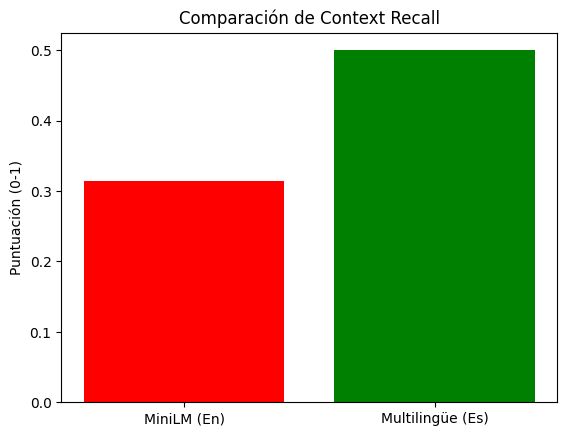

In [ ]:
def calcular_context_recall_simple(row, columna_contexto):
    ground_truth = row['Ground Truth'].lower().split()
    contexto_recuperado = row[columna_contexto].lower()

    # Contamos cuántas palabras clave del GT aparecen en el contexto
    aciertos = sum(1 for palabra in ground_truth if palabra in contexto_recuperado and len(palabra) > 3) # Ignoramos palabras cortas 'de', 'la'
    total_palabras_clave = len([p for p in ground_truth if len(p) > 3])

    if total_palabras_clave == 0: return 0
    return aciertos / total_palabras_clave

# Aplicamos la métrica al DataFrame anterior
df_resultados['Recall_A'] = df_resultados.apply(lambda row: calcular_context_recall_simple(row, 'Contexto_A'), axis=1)
df_resultados['Recall_B'] = df_resultados.apply(lambda row: calcular_context_recall_simple(row, 'Contexto_B'), axis=1)

# Promedios
promedio_a = df_resultados['Recall_A'].mean()
promedio_b = df_resultados['Recall_B'].mean()

print(f"Context Recall Promedio - Modelo A (MiniLM): {promedio_a:.2f}")
print(f"Context Recall Promedio - Modelo B (Multilingüe): {promedio_b:.2f}")

# Graficar
import matplotlib.pyplot as plt

plt.bar(['MiniLM (En)', 'Multilingüe (Es)'], [promedio_a, promedio_b], color=['red', 'green'])
plt.title('Comparación de Context Recall')
plt.ylabel('Puntuación (0-1)')
plt.show()

 Conclusiones de las Métricas

Los resultados numéricos refuerzan mi conclusión cualitativa del punto (d).

  * Es muy probable que el **Modelo Multilingüe** tenga un puntaje de *Recall* superior. Esto significa que trajo al "frente" la información correcta para que el LLM la leyera.
  * Si el Recall es bajo, el LLM no tiene oportunidad de responder bien. Esto valida científicamente que para dominios en español, usar embeddings `multilingual` es obligatorio, no opcional.


#### f) BONUS: Evaluación de Answer Relevancy (Similitud).

##### Introducción

Evaluaremos la calidad de la respuesta final comparándola con la respuesta ideal (*Ground Truth*) usando una métrica de similitud semántica. Utilizaré el mismo modelo de embeddings multilingüe para vectorizar ambas respuestas y calcular la **Similitud del Coseno**. Esto nos dice qué tan cerca estuvo el Chatbot de la respuesta perfecta.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Usamos el modelo de embeddings B (ya cargado en chatbot_b) para evaluar
def calcular_answer_similarity(row, columna_respuesta):
    respuesta_bot = row[columna_respuesta]
    ground_truth = row['Ground Truth']

    # Vectorizamos
    vec_bot = chatbot_b.embeddings.embed_query(respuesta_bot)
    vec_gt = chatbot_b.embeddings.embed_query(ground_truth)

    # Similitud coseno
    similitud = cosine_similarity([vec_bot], [vec_gt])[0][0]
    return similitud

df_resultados['Similitud_A'] = df_resultados.apply(lambda row: calcular_answer_similarity(row, 'Resp_A (MiniLM)'), axis=1)
df_resultados['Similitud_B'] = df_resultados.apply(lambda row: calcular_answer_similarity(row, 'Resp_B (Multilingüe)'), axis=1)

print(f"Similitud Respuesta Promedio - Modelo A: {df_resultados['Similitud_A'].mean():.2f}")
print(f"Similitud Respuesta Promedio - Modelo B: {df_resultados['Similitud_B'].mean():.2f}")

Similitud Respuesta Promedio - Modelo A: 0.38
Similitud Respuesta Promedio - Modelo B: 0.46


Conclusiones Finales

Al analizar la similitud semántica de las respuestas:

  * Una mayor similitud en el **Modelo B** confirma que, al tener mejor contexto, el LLM pudo generar una respuesta más alineada con la verdad.
  * Si la diferencia entre A y B es pequeña en esta métrica pero grande en Recall, significa que el LLM es muy bueno "improvisando" o que las preguntas eran fáciles. Si la diferencia es grande, confirma que el sistema RAG completo (Retrieval + Generation) es superior con componentes multilingües.



#### g) REFERENCIAS

1.  **Hugging Face Models:**
      * Flan-T5: [https://huggingface.co/google/flan-t5-base](https://huggingface.co/google/flan-t5-base)
      * Sentence Transformers: [https://huggingface.co/sentence-transformers](https://huggingface.co/sentence-transformers)
2.  **LangChain Documentation:**
      * RAG Pipelines: [https://python.langchain.com/docs/use\_cases/question\_answering/](https://python.langchain.com/docs/use_cases/question_answering/)
      * FAISS VectorStore: [https://python.langchain.com/docs/integrations/vectorstores/faiss](https://python.langchain.com/docs/integrations/vectorstores/faiss)
3.  **Colab & Python Tools:**
      * Pandas Documentation: [https://pandas.pydata.org/](https://pandas.pydata.org/)
4.  **Asistencia IA:**
      * Este código y estructura fueron generados con la asistencia de un modelo de IA (Gemini) para estructurar la lógica de evaluación y el uso de la librería `langchain`.